In [283]:

pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
 import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import cv2
from sklearn.metrics import mean_squared_error
import multiprocessing
from numba import njit
from skimage import io
from tqdm import tqdm  # Import tqdm for progress bar
import warnings
import os

(2000, 2000, 3)
uint8


True

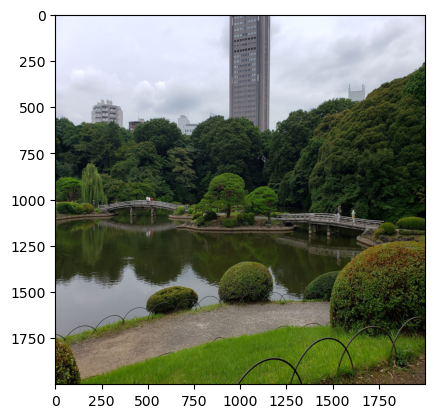

In [116]:
pic=mpl.image.imread("Assignment 2_image.jpg")
plt.imshow(pic)
print(pic.shape)
print(pic.dtype)
cv2.imwrite("pic1.jpg",cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))   # saving the image as pic1

#### Part 1 : q1 image compression using kmeans 

In [117]:
from skimage import io
import cv2
import numpy as np

from sklearn.cluster import KMeans
from skimage.metrics import mean_squared_error
import os
from tqdm import tqdm
import warnings

def compress(k, c):
    img = io.imread('Assignment 2_image.jpg')                         # Reading image from home directory

    if c == 60:
        image = cv2.resize(img, (1980, 1980))                  # resizing to avoid division error when c=60
    else :
        image=img
    windows = []
    for i in tqdm(range(0, image.shape[0], c)):                      # status bar
        for j in range(0, image.shape[1], c):
            window = image[i:i + c, j:j + c]
            windows.append(window)
    
    reshape_windows = np.array(windows)
    reshape_windows = reshape_windows.reshape(reshape_windows.shape[0], -1)

    kmeans = KMeans(n_clusters=k, n_init=10)
    pred = kmeans.fit_predict(reshape_windows)                           # predicting image centers
    
    compressed_windows = np.zeros_like(image)
    ind = 0
    for i in tqdm(range(0, image.shape[0], c)):              
        for j in range(0, image.shape[1], c):
            img = image[i:i + c, j:j + c]
            centers = kmeans.cluster_centers_[pred[ind]]
            compression = centers.reshape(img.shape)
            compressed_windows[i:i + c, j:j + c] = compression             # adding the predicted cluster centers to the compressed windows array
            ind = ind + 1
    
    compressed_image = compressed_windows
    io.imshow(compressed_image)
    name = "pic-k" + str(k) + "-c-" + str(c) + ".jpg"
    cv2.imwrite(name, cv2.cvtColor(compressed_image.astype("uint8"), cv2.COLOR_BGR2RGB))         # changing the compressed image to uint8
    
    csize = os.path.getsize("pic1.jpg")                  # finding the size of original file
    original = os.path.getsize(name)                              
    compression_rate = (original/csize)                  # compression rate
     
    reconstruction_error = mean_squared_error(image.flatten(), compressed_image.flatten())           # reconstruction error using mean squared error
    
    print("Compression rate for k=", k, "and c=", c, "is", compression_rate)
    print("Reconstruction error for k=", k, "and c=", c, "is ", reconstruction_error)


100%|██████████| 100/100 [00:00<00:00, 6626.07it/s]


Compression rate for k= 4 and c= 20 is 0.2651975734961039
Reconstruction error for k= 4 and c= 20 is  680.1556315


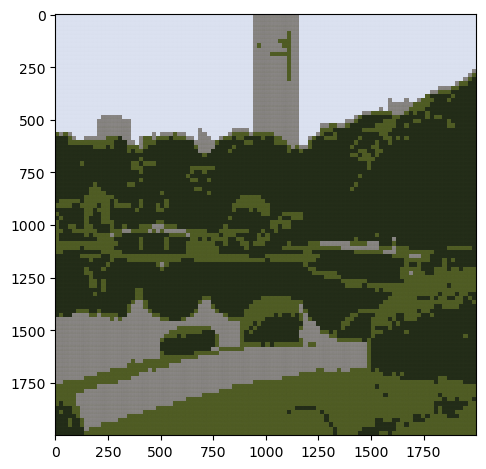

In [118]:
k=[4,8,16]
c=[20,40,60]
compress(4,20)   #multiple lines used instead of loop 

100%|██████████| 50/50 [00:00<00:00, 5751.77it/s]


Compression rate for k= 4 and c= 40 is 0.2898295721089158
Reconstruction error for k= 4 and c= 40 is  797.2447156666667


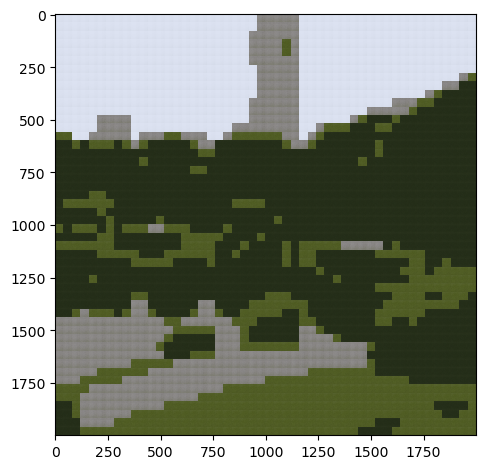

In [119]:
compress(4,40)

100%|██████████| 33/33 [00:00<00:00, 7751.57it/s]


Compression rate for k= 4 and c= 60 is 0.3347498692790251
Reconstruction error for k= 4 and c= 60 is  829.4308108016189


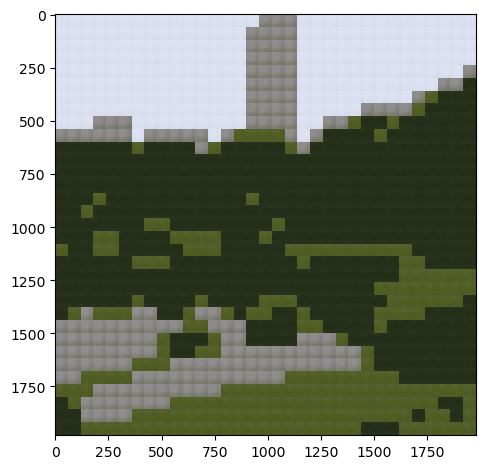

In [120]:
compress(4,60)

100%|██████████| 100/100 [00:00<00:00, 6007.65it/s]


Compression rate for k= 8 and c= 20 is 0.31389298488744555
Reconstruction error for k= 8 and c= 20 is  531.66371925


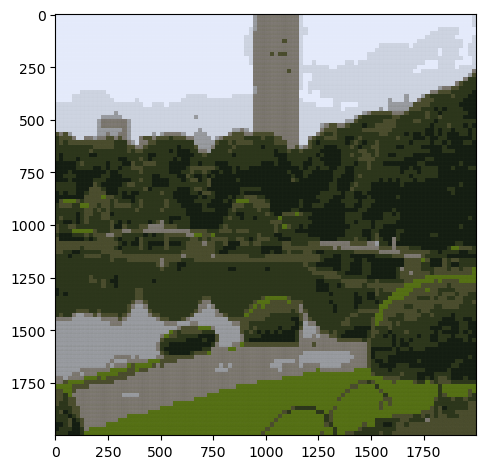

In [121]:
compress(8,20)

100%|██████████| 50/50 [00:00<00:00, 7792.92it/s]


Compression rate for k= 8 and c= 40 is 0.3331496294782855
Reconstruction error for k= 8 and c= 40 is  641.779587


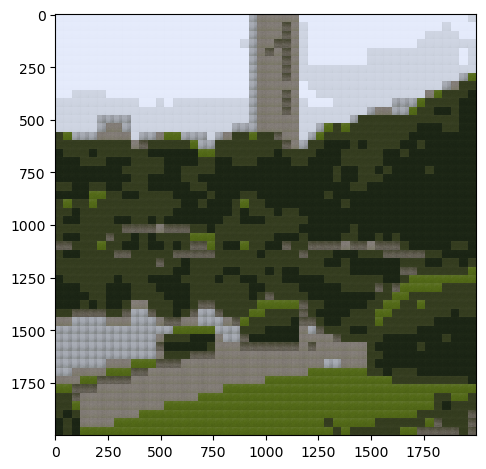

In [122]:
compress(8,40)

100%|██████████| 33/33 [00:00<00:00, 8446.45it/s]


Compression rate for k= 8 and c= 60 is 0.381250243631637
Reconstruction error for k= 8 and c= 60 is  644.867923681257


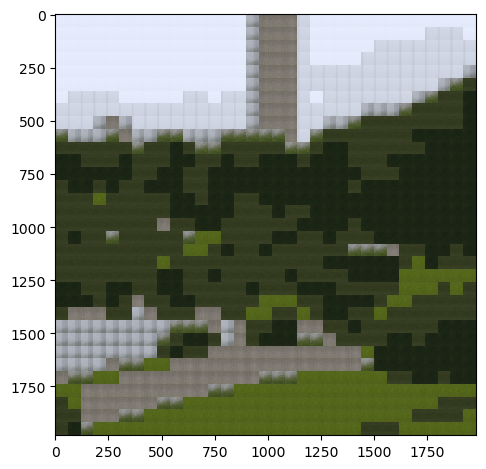

In [123]:
compress(8,60)

100%|██████████| 100/100 [00:00<00:00, 6426.77it/s]


Compression rate for k= 16 and c= 20 is 0.37891608452707237
Reconstruction error for k= 16 and c= 20 is  467.7156674166667


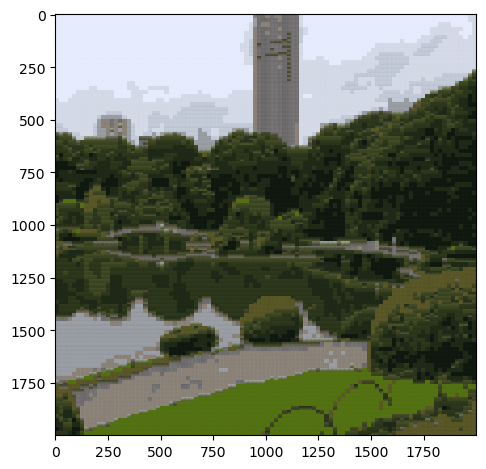

In [124]:
compress(16,20)

100%|██████████| 50/50 [00:00<00:00, 5533.09it/s]


Compression rate for k= 16 and c= 40 is 0.39168305439471146
Reconstruction error for k= 16 and c= 40 is  542.11186025


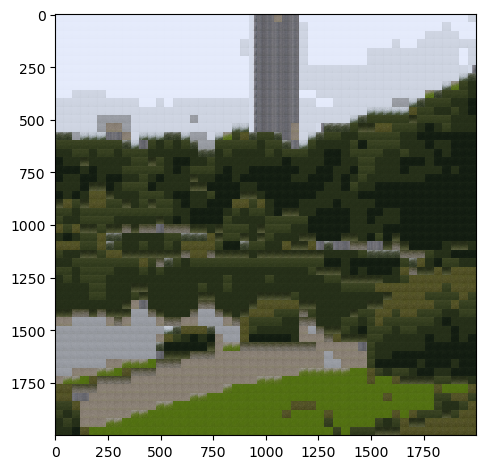

In [125]:
compress(16,40)

100%|██████████| 33/33 [00:00<00:00, 7715.27it/s]


Compression rate for k= 16 and c= 60 is 0.44026421094937707
Reconstruction error for k= 16 and c= 60 is  519.3615397238377


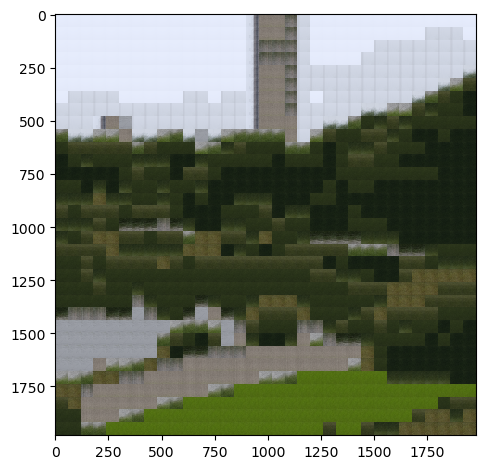

In [126]:
compress(16,60)

#### part 1 q2: Reconstruction error for k= 16 and c= 20 is  467.1731805 is the lowest 

#  part 1 q2 Image compression with hierarchical clustering 

In [127]:
from sklearn.cluster import AgglomerativeClustering


def compress(k, c):
    img = io.imread('Assignment 2_image.jpg')

    if c == 60:
        image = cv2.resize(img, (1980, 1980))
    else:
        image = img

    windows = []
    for i in tqdm(range(0, image.shape[0], c)):
        for j in range(0, image.shape[1], c):
            window = image[i:i + c, j:j + c]
            windows.append(window)
    
    reshape_windows = np.array(windows)
    reshape_windows = reshape_windows.reshape(reshape_windows.shape[0], -1)         # reshaping the windows to 2d 

    clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')           # complete linkage hierarchical culstering 
    pred = clustering.fit_predict(reshape_windows)

    compressed_windows = np.zeros_like(image)
    ind = 0
    for i in tqdm(range(0, image.shape[0], c)):
        for j in range(0, image.shape[1], c):
            img = image[i:i + c, j:j + c]
            cluster_idx = pred[ind]
            if len(reshape_windows[pred == cluster_idx]) == 0:  # Check for empty cluster            # reshaped windows will have values from 1 to 4 and is checkedd when the predicted value same as k value
               
                compression = img
            else:
                centers = np.mean(reshape_windows[pred == cluster_idx], axis=0) # If the cluster is empty,  the original window is used
                compression = centers.reshape(img.shape)
            compressed_windows[i:i + c, j:j + c] = compression              # compressed windows will have the compressed image
            ind += 1
    
    compressed_image = compressed_windows
    io.imshow(compressed_image)
    name = "pic-agglo-k" + str(k) + "-c-" + str(c) + ".jpg"
    cv2.imwrite(name, cv2.cvtColor(compressed_image.astype("uint8"), cv2.COLOR_BGR2RGB))
    
    csize = os.path.getsize("Assignment 2_image.jpg")
    original = os.path.getsize(name)
    compression_rate = (original/csize)
    
    reconstruction_error = mean_squared_error(image.flatten(), compressed_image.flatten())
    
    print("Compression rate for k=", k, "and c=", c, "is", compression_rate)
    print("Reconstruction error for k=", k, "and c=", c, "is", reconstruction_error)


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Compression rate for k= 4 and c= 20 is 0.40911110467194034
Reconstruction error for k= 4 and c= 20 is 903.17696875


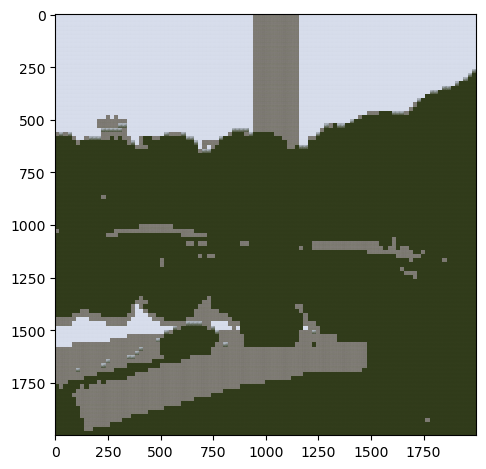

In [128]:
compress(4,20)


100%|██████████| 50/50 [00:05<00:00,  9.85it/s]


Compression rate for k= 4 and c= 40 is 0.5061453835975003
Reconstruction error for k= 4 and c= 40 is 945.8915290833334


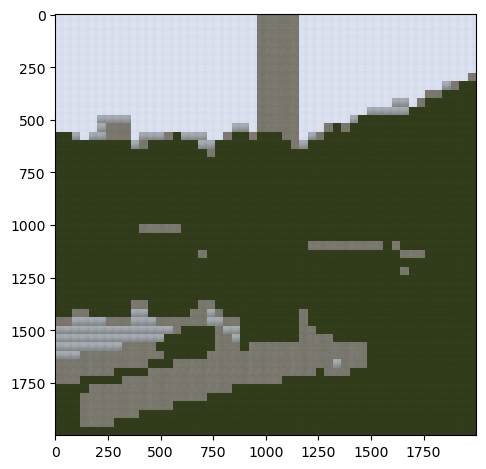

In [129]:
compress(4,40)

100%|██████████| 33/33 [00:01<00:00, 22.10it/s]


Compression rate for k= 4 and c= 60 is 0.6092984845411608
Reconstruction error for k= 4 and c= 60 is 892.6397023262932


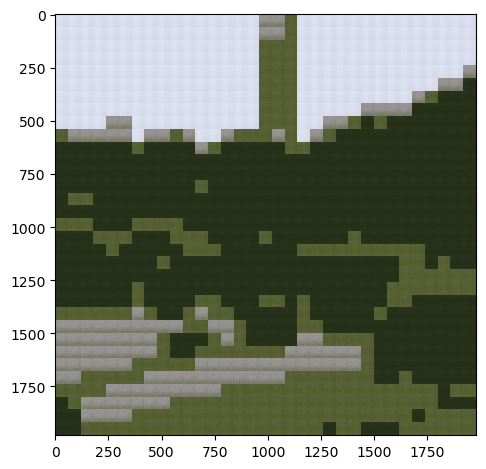

In [130]:
compress(4,60)

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Compression rate for k= 8 and c= 20 is 0.43354896506427903
Reconstruction error for k= 8 and c= 20 is 798.07885975


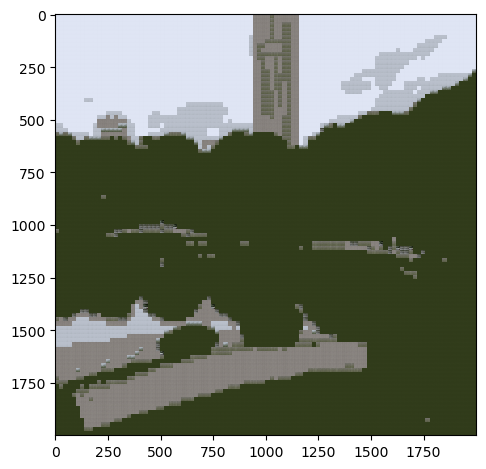

In [131]:
compress(8,20)

100%|██████████| 50/50 [00:03<00:00, 16.18it/s]


Compression rate for k= 8 and c= 40 is 0.5493357190461012
Reconstruction error for k= 8 and c= 40 is 739.9379235


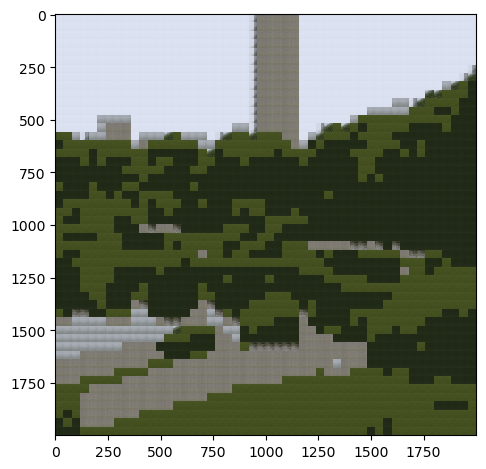

In [132]:
compress(8,40)

100%|██████████| 33/33 [00:01<00:00, 25.19it/s]


Compression rate for k= 8 and c= 60 is 0.6492507219920218
Reconstruction error for k= 8 and c= 60 is 712.9197333605414


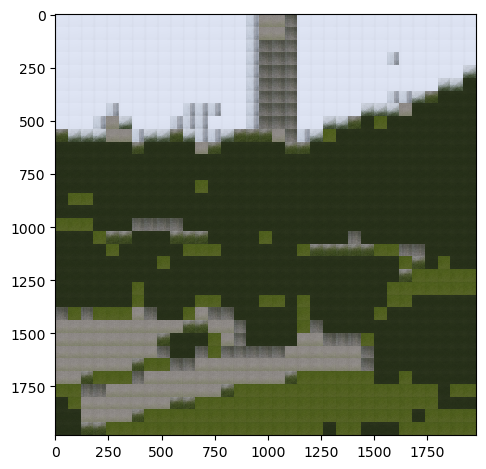

In [133]:
compress(8,60)

100%|██████████| 100/100 [00:13<00:00,  7.16it/s]


Compression rate for k= 16 and c= 20 is 0.5326924748630871
Reconstruction error for k= 16 and c= 20 is 623.628046


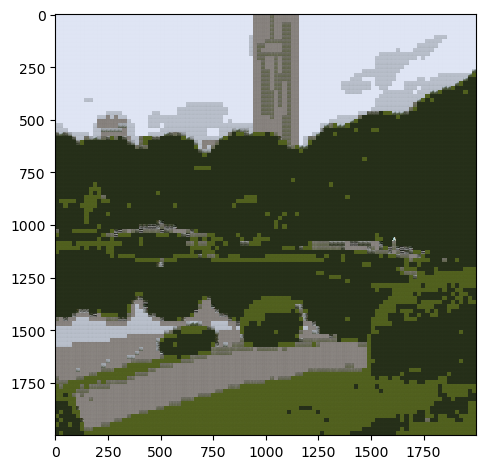

In [134]:
compress(16,20)

100%|██████████| 50/50 [00:03<00:00, 16.32it/s]


Compression rate for k= 16 and c= 40 is 0.5883112147817604
Reconstruction error for k= 16 and c= 40 is 687.43834525


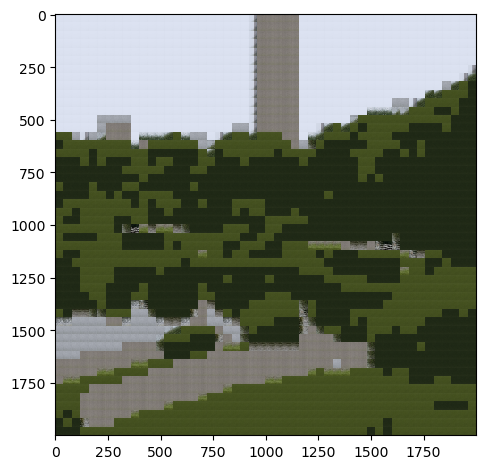

In [135]:
compress(16,40)

100%|██████████| 33/33 [00:01<00:00, 24.31it/s]


Compression rate for k= 16 and c= 60 is 0.6795478253310538
Reconstruction error for k= 16 and c= 60 is 634.2601156344591


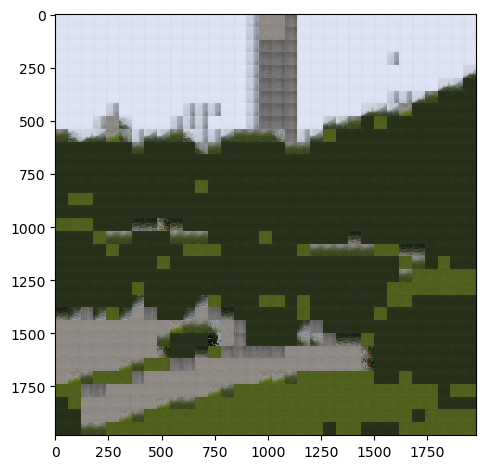

In [136]:
compress(16,60)

#### part 1 qes 4: Reconstruction error for k= 16 and c= 20 is 623.628046 is the lowest 

In [137]:
import pandas as pd
import numpy as np
head=["sepal_length_in_cm","sepal_widthin_cm","petal_length_in_cm","petal_width_in_cm","class"]
df=pd.read_csv("iris.data",names=head)

In [138]:
df
df1=df

In [139]:
df['class']=pd.factorize(df['class'])[0]
print("0=setosa\t 1= Versicolour \t 2=virginica")

0=setosa	 1= Versicolour 	 2=virginica


In [140]:
df

sepal_length_in_cm  sepal_widthin_cm  petal_length_in_cm  \
0                   5.1               3.5                 1.4   
1                   4.9               3.0                 1.4   
2                   4.7               3.2                 1.3   
3                   4.6               3.1                 1.5   
4                   5.0               3.6                 1.4   
..                  ...               ...                 ...   
145                 6.7               3.0                 5.2   
146                 6.3               2.5                 5.0   
147                 6.5               3.0                 5.2   
148                 6.2               3.4                 5.4   
149                 5.9               3.0                 5.1   

     petal_width_in_cm  class  
0                  0.2      0  
1                  0.2      0  
2                  0.2      0  
3                  0.2      0  
4                  0.2      0  
..                 ...    ...  
145                2.3      2  
146                1.9      2  
147                2.0      2  
148                2.3      2  
149                1.8      2  

[150 rows x 5 columns]

In [141]:
df1=df[df['class']==0]
df2=df[df['class']==1]
df3=df[df['class']==2]

In [142]:
df1.head(5)
from scipy.stats import multivariate_normal

In [143]:
data0=np.asanyarray(df1)
data1=np.asanyarray(df1)
data2=np.asanyarray(df1)

In [144]:

data0

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [145]:
print(np.max(data0[:,0]))
print(np.min(data0[:,0]))

5.8
4.3


In [146]:
data0[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

# part 2 ques 1 visualizing kernel estimate using Gaussian Kernel

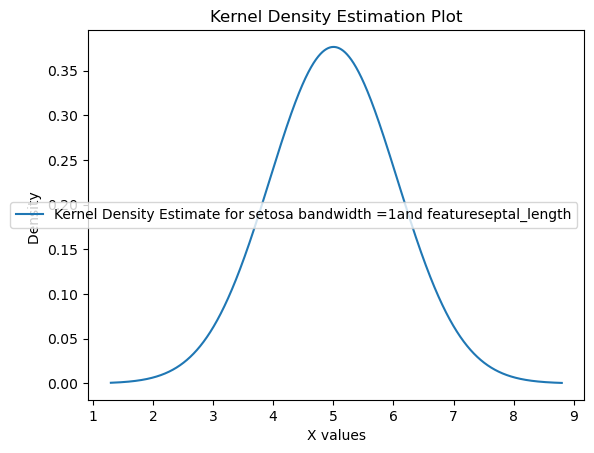

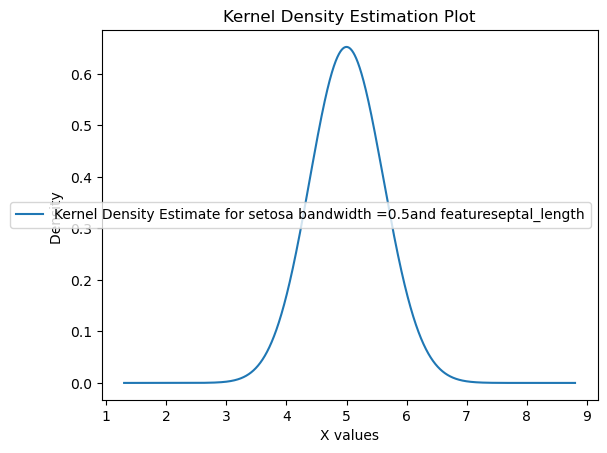

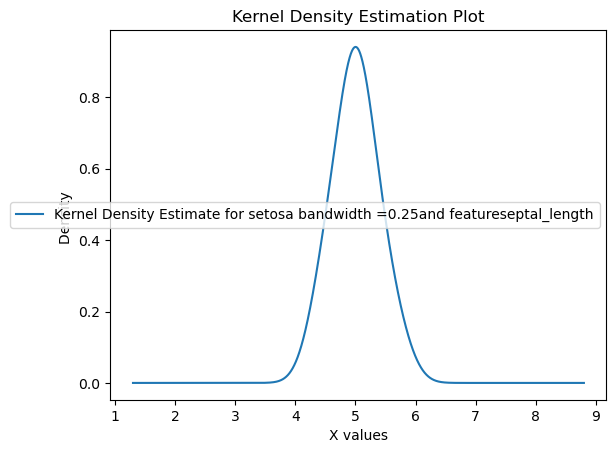

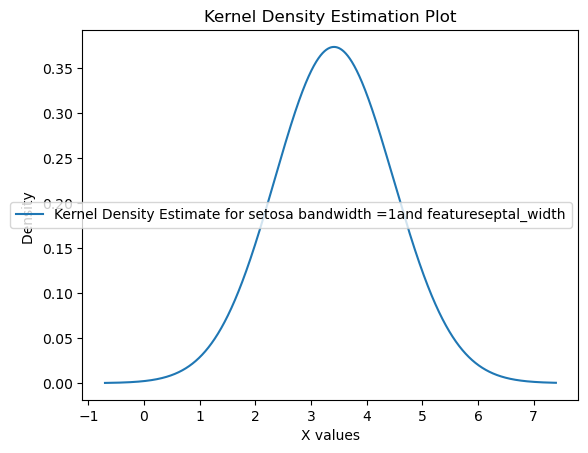

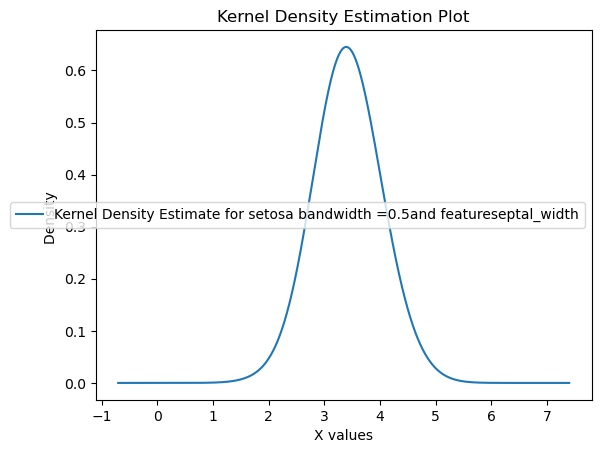

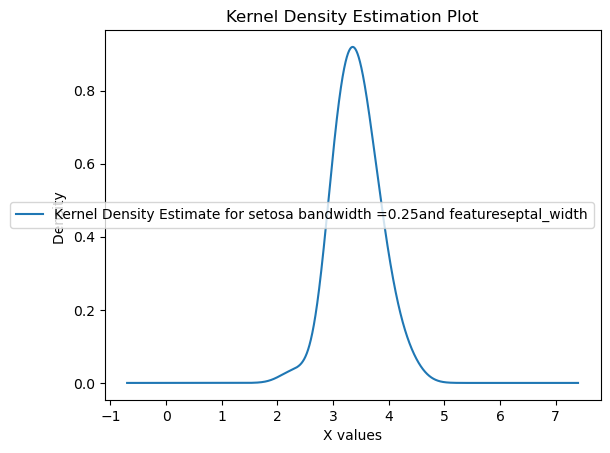

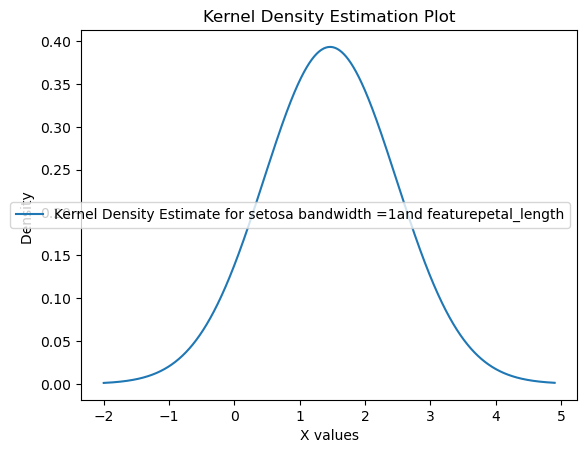

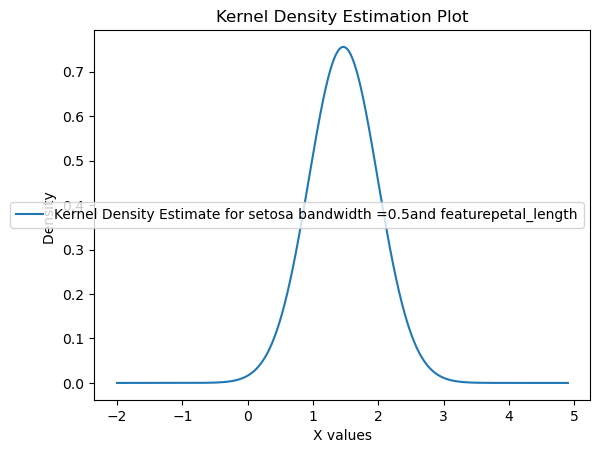

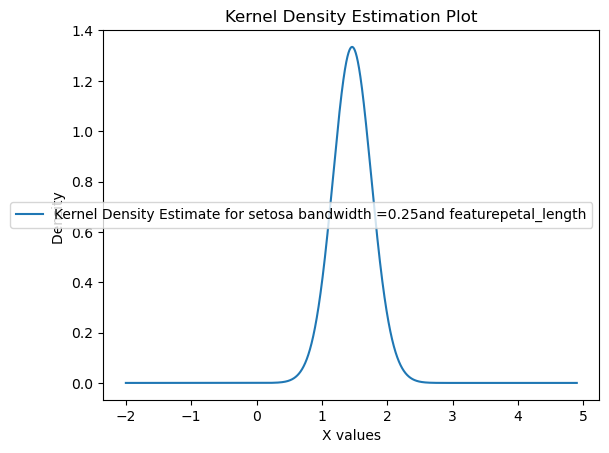

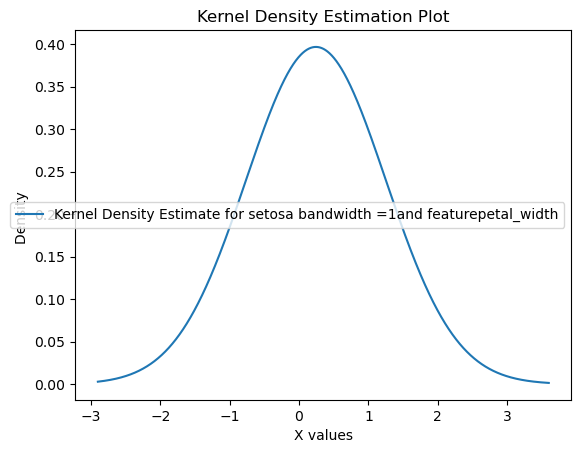

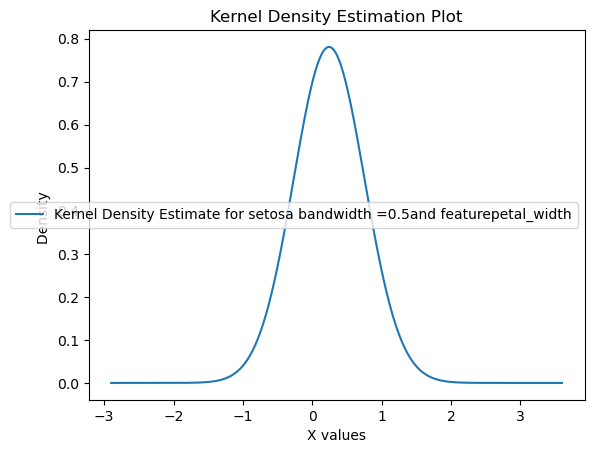

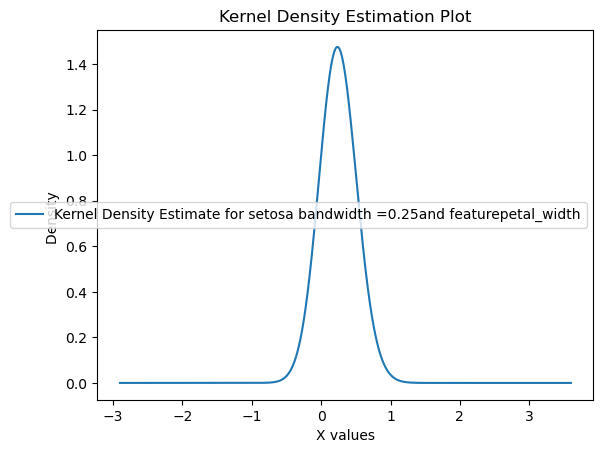

In [147]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
data=[data0,data1,data2]
band=[1,0.5,0.25]

for i in range(4):
    for b in band:
        name=['septal_length','septal_width','petal_length','petal_width','class_name']             #class names used
        X=data0[:,i].reshape(-1,1)
        X_plot = np.linspace(min(X)-3, max(X)+3, 10000).reshape(-1, 1)  # Ensure X_plot is a 2D array
        kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(X)
        log_dens = kde.score_samples(X_plot)                    # gives the desity of points 
        lab="Kernel Density Estimate for setosa bandwidth ="+str(b)+"and feature"+name[i]
        plt.plot(X_plot, np.exp(log_dens), label=lab)              #ploting data
        plt.xlabel("X values")
        plt.ylabel("Density ")
        plt.title("Kernel Density Estimation Plot")
        plt.legend()
        plt.show()

            

references
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py

In [148]:
datac1=df1=np.asanyarray(df[df['class']==0])
datac2=df2=np.asanyarray(df[df['class']==1])
datac3=df3=np.asanyarray(df[df['class']==2])

np.random.shuffle(datac1)
np.random.shuffle(datac2)
np.random.shuffle(datac3)

In [149]:
from sklearn.model_selection import train_test_split
train=np.zeros((1,5))
test=np.zeros((1,5))
def stratify(dat,train,test):
    X_train, X_test, y_train, y_test = train_test_split(dat[:,0:5], dat[:,4], test_size=0.5, random_state=42)  #spliting data
    train=np.append(train,X_train,axis=0)
    test=np.append(test,X_test,axis=0)
    return train,test
x,y=stratify(datac1,train,test)
x,y=stratify(datac2,x,y)
x,y=stratify(datac3,x,y)


In [150]:
x=x[1:,:]
y=y[1:,:]
np.random.shuffle(x)                             # shuffling the data
np.random.shuffle(y)         
print(x)


[[6.4 2.7 5.3 1.9 2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.  2.7 5.1 1.6 1. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [4.9 2.4 3.3 1.  1. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [5.5 2.6 4.4 1.2 1. ]
 [5.1 3.5 1.4 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [6.3 2.8 5.1 1.5 2. ]
 [6.7 3.  5.  1.7 1. ]
 [4.6 3.4 1.4 0.3 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [7.1 3.  5.9 2.1 2. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.8 2.7 3.9 1.2 1. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.8 2.8 4.8 1.4 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [6.7 3.  5.2 2.3 2. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [7.7 2.8 6.7 2.  2. ]
 [4.8 3.1 1.6 0.2 0. ]
 [7.2 3.  5.8 1.6 2. ]
 [6.4 3.2 4.5 1.5 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [6.2 3.4 5

### part 2 que 2

In [151]:
print("the stratified training data is ")
print(x)                                        #stratified sampling is done
print("the stratified testing data is ")
print(y)
x.shape

the stratified training data is 
[[6.4 2.7 5.3 1.9 2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.  2.7 5.1 1.6 1. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [4.9 2.4 3.3 1.  1. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [5.5 2.6 4.4 1.2 1. ]
 [5.1 3.5 1.4 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [6.3 2.8 5.1 1.5 2. ]
 [6.7 3.  5.  1.7 1. ]
 [4.6 3.4 1.4 0.3 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [7.1 3.  5.9 2.1 2. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.8 2.7 3.9 1.2 1. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.8 2.8 4.8 1.4 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [6.7 3.  5.2 2.3 2. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [7.7 2.8 6.7 2.  2. ]
 [4.8 3.1 1.6 0.2 0. ]
 [7.2 3.  5.8 1.6 2. ]
 [6.4 3.2 4.5 1.5 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.8 2.7 5.1 1.9 2. ]
 

(75, 5)

### part 2 question 3 knn classifier and confusion matrix

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
def knear(n):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x[:,0:4],x[:,4])
    predicted=knn.predict(y[:,0:4])
    pred_accur=accuracy_score(y[:,4],predicted)                # knn  is used for different k values)
    print("accuracy for neigbour ",n,"is",pred_accur)
    M = confusion_matrix(y[:,4], predicted,labels=[0,1,2]) 
    disp = ConfusionMatrixDisplay(confusion_matrix=M,                             # confusion matrix
    display_labels=['setosa', ' Versicolour ','virginica'])
    disp.plot()
    plt.show()

    


accuracy for neigbour  3 is 0.9733333333333334


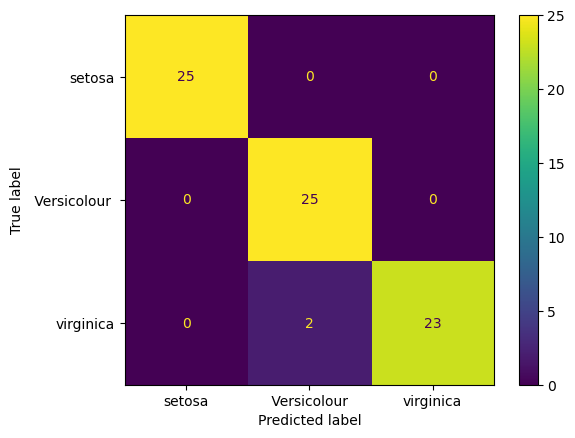

accuracy for neigbour  5 is 0.96


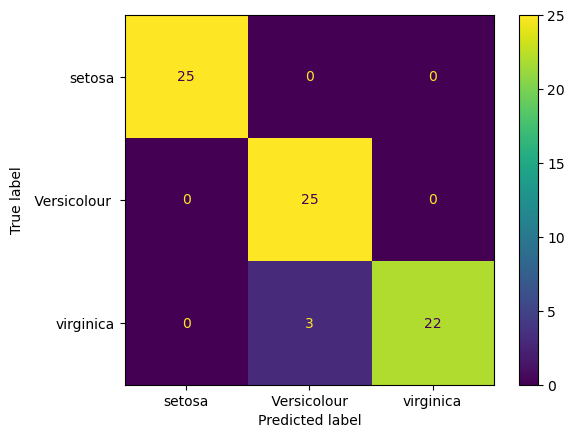

accuracy for neigbour  10 is 0.9066666666666666


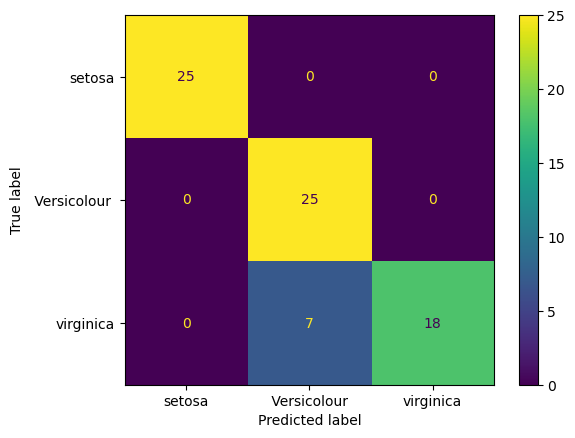

accuracy for neigbour  20 is 0.92


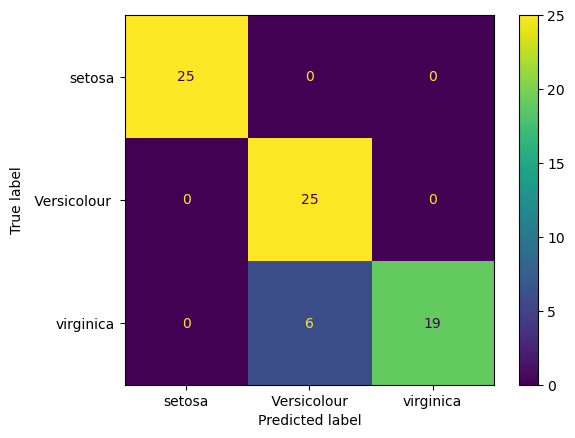

In [153]:
knear(3)
knear(5)
knear(10)
knear(20)

### best performing is accuracy for neigbour  10 is 0.9733333333333334 . k value of 10 best fits the data .

### the best k value changes from data to data and is determined based on trial and error .crosvalidation and other optimization techniques such as bayesian optimization etc.

# part 2 question 4

In [154]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini')                # decision tree using gini
clf=clf.fit(x[:,0:4],x[:,4])
pred=clf.predict(y[:,0:4])
pred_accur=accuracy_score(y[:,4],pred)
pred_accur
print(pred_accur)
M1 = confusion_matrix(y[:,4], pred,labels=[0,1,2]) 
print(M1)


0.9333333333333333
[[25  0  0]
 [ 0 23  2]
 [ 0  3 22]]


# part 2 question 5

In [155]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(x[:,0:4],x[:,4])                 # sigmoid funciton
pred=clf.predict(y[:,0:4])
pred_accur=accuracy_score(y[:,4],pred)
print(pred_accur)
M1 = confusion_matrix(y[:,4], pred,labels=[0,1,2]) 
print(M1)

0.9466666666666667
[[25  0  0]
 [ 0 25  0]
 [ 0  4 21]]


/packages/apps/jupyter/2023-10-09/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Part 2 question 6 among the 3 methods largely logistic regression attains best possible accuracy(LR and decision tree could be equal). The knn uses distance as a measure to assume a particular dataset falls in a datapoint . and the correct k value should be found using trial and error so its relatively less accurate . and decision tree tend to overfit and could lead to generalization error .Logistic regression on the other hand is least affected by overfitting and has high generalization accuracy and the inverse of logit function could fit correctly the classes 

## Part 2 question 7 The biggest difference between logistic regression and other mehtods are logistic regression uses the log odds and uses the weights of each of the features to properly classify the data . the knn uses distance and closeness as a measuere to classify a particular group and the decision tree follows number of split based on the users input thus reaching a point where there is minimal entropy .also logistic regression attains good generalisation compared to other two methods

In [156]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
'''
import cv2
import argparse
import numpy as np

# handle command line arguments
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image Assignment 2_image 1.jpg', required=True,
                help = 'Assignment 2_image 1.jpg')
ap.add_argument('-c', '--config config yolov3.cfg', required=True,
                help = 'config yolov3.cfg')
ap.add_argument('-w', '--weights yolov3.weights', required=True,
                help = 'weights yolov3.weights')
ap.add_argument('-cl', '--classes yolov3.txt', required=True,
                help = 'yolov3.txt')
args = ap.parse_args()
'''

"\nimport cv2\nimport argparse\nimport numpy as np\n\n# handle command line arguments\nap = argparse.ArgumentParser()\nap.add_argument('-i', '--image Assignment 2_image 1.jpg', required=True,\n                help = 'Assignment 2_image 1.jpg')\nap.add_argument('-c', '--config config yolov3.cfg', required=True,\n                help = 'config yolov3.cfg')\nap.add_argument('-w', '--weights yolov3.weights', required=True,\n                help = 'weights yolov3.weights')\nap.add_argument('-cl', '--classes yolov3.txt', required=True,\n                help = 'yolov3.txt')\nargs = ap.parse_args()\n"

In [158]:
#python yolo_opencv.py --image dog.jpg --config yolov3.cfg --weights yolov3.weights --classes yolov3.txt

### part 3 ques 1

In [159]:
import cv2
import numpy as np
from PIL import Image

image1 = Image.open('Assignment 2_image 1.jpg')

image = image1.resize((255, 255))
image=np.array(image)

Width = 255
Height = 255
scale = 0.00392

# read class names from text file
classes = None
with open("yolov3.txt", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)
print(image.shape)


(255, 255, 3)


In [160]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
blob = cv2.dnn.blobFromImage(image, scale, (Width,Height), (0,0,0), True, crop=False)
net.setInput(blob)

In [161]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i-1 ] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [162]:
outs = net.forward(get_output_layers(net))

In [163]:



# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [164]:

indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


for i in indices:
    #i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

cv2.imwrite("object-detection.jpg", image)

cv2.waitKey()

cv2.destroyAllWindows()


### for the given image that of cat and dog the yolo3 detects both of them as dogs . but when the image is cropped so that only half of the cat can be seen then it correctly detects as cat and dog.It incorrectly defines cat as dog since its learning model has much less information on the model of cat compared to dog . using advanced yolo like yolo 5 would give proper prediction


### Part 3 ques 2 perceptrons are basic computational element of a neural network and multilayer perceptrons consits of multiple nural networworks with multiple hidden and i/o layers .each neuron interacts with one another each element perfomrming functions such as sigmoid ,linear regresson or other classification functions .It is largely used for prediction and extrapolation.
### consvolutional neural networks are largely used to process image datas especially classificatoin identification etc . 

 # showing the image might kill the kernel image is saved as object-detection.jpg

In [ ]:
cv2.imshow("object detection", image)